In [1]:
# Importaciones
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import norm

df = pd.read_csv('/Users/yairmartinez/Documents/GitHub/Bedu/1/DB.csv')
df = df.set_index("ID")
df.head(3)

,Monto Factura,Zona
ID,,
1,27391.4,Norte
2,15925.6,Norte
3,33742.5,Norte


In [2]:
# Total
zonas = df.groupby(['Zona']).count()
zonas.index

Index(['Norte', 'Sur'], dtype='object', name='Zona')

In [3]:
# Porcentajes
zona_Norte = zonas["Monto Factura"]["Norte"]
zona_Sur = zonas["Monto Factura"]["Sur"]
zona_TOTAL = zona_Norte + zona_Sur

per_zona_Norte = zona_Norte / zona_TOTAL
per_zona_Sur = zona_Sur / zona_TOTAL

print(per_zona_Norte,per_zona_Sur)

0.62 0.38


In [4]:
# Media agrupado
df.groupby(['Zona']).mean()

,Monto Factura
Zona,
Norte,28468.370968
Sur,24450.763158


In [5]:
# Media total
media_total = df["Monto Factura"].mean()
media_norte = df[df["Zona"]=="Norte"]["Monto Factura"].mean()
media_sur = df[df["Zona"]=="Sur"]["Monto Factura"].mean()
print(media_norte,"/", media_sur,"/",media_total)

28468.37096774194 / 24450.763157894737 / 26941.679999999997


In [6]:
# Desviación estandard agrupada
df.groupby(['Zona']).std()

,Monto Factura
Zona,
Norte,10174.239277
Sur,10267.674461


In [7]:
# Desviación estandard total
dev_std_total = df["Monto Factura"].std()
dev_std_norte = df[df["Zona"]=="Norte"]["Monto Factura"].std()
dev_std_sur = df[df["Zona"]=="Sur"]["Monto Factura"].std()
print(dev_std_norte,"/", dev_std_sur,"/",dev_std_total)

10174.23927705633 / 10267.674461262206 / 10294.886641772157


<AxesSubplot:ylabel='Frequency'>

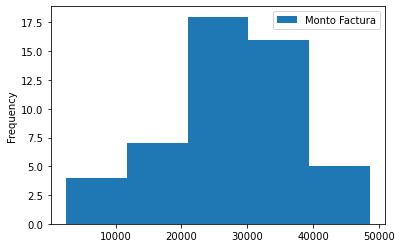

In [8]:
# Distribución por histograma todos
df.plot.hist(bins =5)

Zona
Norte    AxesSubplot(0.125,0.125;0.775x0.755)
Sur      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

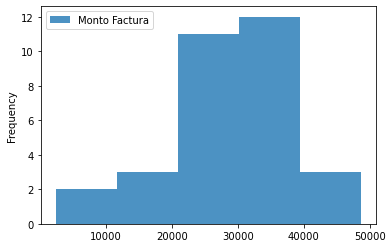

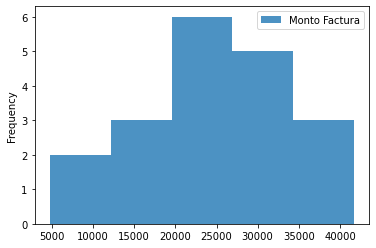

In [9]:
# Distribución por histograma agrupado por zonas
df.groupby(["Zona"]).plot.hist(bins=5, alpha=0.8)

In [10]:
# Roeuba Shaphiro-Wilk total
shapiro(df["Monto Factura"])

ShapiroResult(statistic=0.981462836265564, pvalue=0.6150892972946167)

In [11]:
# Roeuba Shaphiro-Wilk Norte
shapiro(df[df["Zona"]=="Norte"]["Monto Factura"])

ShapiroResult(statistic=0.978783369064331, pvalue=0.7780268788337708)

In [12]:
# Roeuba Shaphiro-Wilk Norte
shapiro(df[df["Zona"]=="Sur"]["Monto Factura"])

ShapiroResult(statistic=0.9678279161453247, pvalue=0.7323327660560608)

In [13]:
# Probabilidad de ser mayor a 30,000 en Norte
1-norm(loc=media_norte, scale= dev_std_norte).cdf(30000)

0.44016933420144255

In [14]:
# Probabilidad de ser mayor a 30,000 en Sur
1-norm(loc=media_sur, scale= dev_std_sur).cdf(30000)

0.2944409435700115

In [15]:
# Probabilidad de ser mayor a 30,000 en Total
1-norm(loc=media_total, scale= dev_std_total).cdf(30000)

0.3832058654242273